<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/NLP-Projects/blob/main/VectorVisualization-GloVe-Embedding/vec_visualization_glove_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import requests
import zipfile
import io
import os

# Define Sample Words

In [3]:
word_groups = {
    'Animals': ['lion', 'tiger', 'cat', 'dog', 'horse', 'rabbit', 'elephant', 'monkey', 'cow', 'wolf'],
    'Countries': ['iran', 'france', 'germany', 'china', 'japan', 'italy', 'brazil', 'russia', 'india', 'egypt'],
    'Foods': ['apple', 'banana', 'pizza', 'burger', 'rice', 'bread', 'cake', 'coffee', 'tea', 'cheese']
}

all_target_words = [w for group in word_groups.values() for w in group]


# Download GloVe

In [6]:
GLOVE_FILENAME = "glove.6B.50d.txt"

def download_glove():
    if not os.path.exists(GLOVE_FILENAME):
        print("Downloading glove...")
        url = "http://nlp.stanford.edu/data/glove.6B.zip"
        r = requests.get(url)
        z = zipfile.ZipFile(io.BytesIO(r.content))
        z.extractall()
        print("Done.")
    else:
        print("GloVe already exists.")

download_glove()

Done.


# Creating Embedding Matrix

In [11]:
def load_specific_vectors(file_path, word_list):
    vectors = {}
    words_found = []

    print("Reading GloVe file and extracting vectors..")

    with open(file_path, "r", encoding='utf-8') as f:
        for line in f:
            parts = line.split()
            word = parts[0]
            if word in word_list:
                vec = np.array(parts[1:], dtype=np.float32)
                vectors[word] = vec
                words_found.append(word)

                if len(words_found) == len(word_list):
                    break
    print(f"Extracted {len(vectors)} vectors.")
    return vectors

word_vectors_dict = load_specific_vectors(GLOVE_FILENAME, all_target_words)

Reading GloVe file and extracting vectors..
Extracted 30 vectors.


# PCA

In [12]:
# Prepare lists for PCA ensuring the order matches
ordered_vectors = []
ordered_labels = []
ordered_colors = []

# Define colors for each group
colors = {'Animals': 'red', 'Countries': 'blue', 'Foods': 'green'}

# Organize data structure for plotting
for group_name, words in word_groups.items():
    for w in words:
        if w in word_vectors_dict:
            ordered_vectors.append(word_vectors_dict[w])
            ordered_labels.append(w)
            ordered_colors.append(colors[group_name])
        else:
            print(f"Warning: Word '{w}' not found in GloVe vocabulary.")

# convert to np array
X = np.array(ordered_vectors)
print(f"Data shape before PCA: {X.shape}")

Data shape before PCA: (30, 50)


*Dimensionality Reduction With PCA*

In [13]:
# Initialize PCA to reduce 50 dimensions down to 2
pca = PCA(n_components=2)

# Apply PCA
result = pca.fit_transform(X)

print(f"Data Shape after PCA: {result.shape}") # Expected: (30, 2)


Data Shape after PCA: (30, 2)


# Visualization

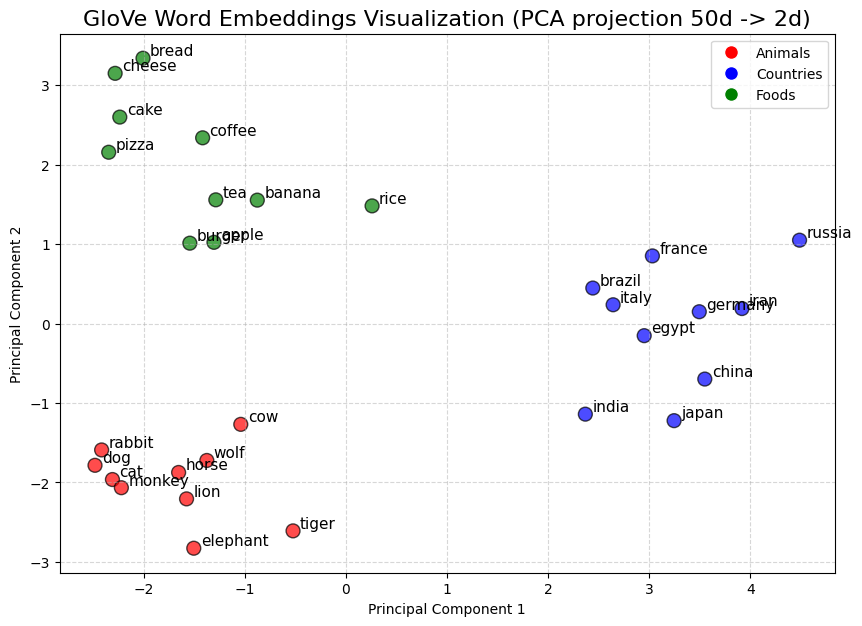

In [15]:
plt.figure(figsize=(10, 7))

# Create the scatter plot
plt.scatter(result[:, 0], result[:, 1], c=ordered_colors, s=100, edgecolors='k', alpha=0.7)

# Annotate each point with its word label
for i, word in enumerate(ordered_labels):
    plt.annotate(word,
                 xy=(result[i, 0], result[i, 1]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 fontsize=11)

# Create a custom legend manually
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=k,
                          markerfacecolor=v, markersize=10) for k, v in colors.items()]
plt.legend(handles=legend_elements, loc='best')

# Chart decorations
plt.title('GloVe Word Embeddings Visualization (PCA projection 50d -> 2d)', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()